# Looking for the **"All-in-one"** notebook?

It's located [here at this link](https://colab.research.google.com/drive/19jZDFIqD-ABndSgd1EQzSl_soQ-FU4J-#scrollTo=e-xLewmU4p0s&uniqifier=1)

<br>

#   Homework 8
+ clasification via decision trees and random forests...
+ which are both "the same" as k-nearest-neighbors, and
+ "the opposite" of k-nearest-neighbors!

It all hinges on how we define ***near*** .

Let's see how it works:



# Decision Trees: Iris Example

In [ ]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [ ]:
# let's read in our flower data...
#
# be sure to upload iris_cleaned.csv, which should be in the zip archive for this week
#
filename = 'iris_cleaned.csv'
df_clean1 = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

iris_cleaned.csv : file read into a pandas dataframe.


In [ ]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_clean1.shape is {df_clean1.shape}\n")
df_clean1.info()  # prints column information

# easiest way to print all rows:   print(df_tidy.to_string())
# or, in table form:
# pd.set_option("display.min_rows",150)  # 10 is default
# pd.set_option("display.max_rows",150)  # 10 is default
# or, the deafult:
df_clean1


df_clean1.shape is (141, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sepallen  141 non-null    float64
 1   sepalwid  141 non-null    float64
 2   petallen  141 non-null    float64
 3   petalwid  141 non-null    float64
 4   irisname  141 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


,sepallen,sepalwid,petallen,petalwid,irisname
0,4.6,3.6,1.0,0.2,setosa
1,4.3,3.0,1.1,0.1,setosa
2,5.0,3.2,1.2,0.2,setosa
3,5.8,4.0,1.2,0.2,setosa
4,4.4,3.0,1.3,0.2,setosa
...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,virginica
137,7.6,3.0,6.6,2.1,virginica
138,7.7,3.8,6.7,2.2,virginica
139,7.7,2.8,6.7,2.0,virginica


In [ ]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")
print(f"COL_INDEX[ 'petallen' ] is {COL_INDEX[ 'petallen' ]}")

COLUMNS is Index(['sepallen', 'sepalwid', 'petallen', 'petalwid', 'irisname'], dtype='object')
COLUMNS[0] is sepallen

COL_INDEX is {'sepallen': 0, 'sepalwid': 1, 'petallen': 2, 'petalwid': 3, 'irisname': 4}
COL_INDEX[ 'petallen' ] is 2


In [ ]:

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers

#
# First, let's map our different species to numeric values:

SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

def convert_species(speciesname):
    """ return the species index (a unique integer/category) """
    #print(f"converting {speciesname}...")
    return SPECIES_INDEX[speciesname]

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {convert_species(name)}")

setosa maps to 0
versicolor maps to 1
virginica maps to 2


In [ ]:
#
# we can "apply" to a whole column and create a new column
#   it may give a warning, but this is ok...
#

df_tidy = df_clean1.copy()  # copy everything AND...

# add a new column, 'irisnum'
df_tidy['irisnum'] = df_clean1['irisname'].apply(convert_species)

# let's see...
df_tidy

,sepallen,sepalwid,petallen,petalwid,irisname,irisnum
0,4.6,3.6,1.0,0.2,setosa,0
1,4.3,3.0,1.1,0.1,setosa,0
2,5.0,3.2,1.2,0.2,setosa,0
3,5.8,4.0,1.2,0.2,setosa,0
4,4.4,3.0,1.3,0.2,setosa,0
...,...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,virginica,2
137,7.6,3.0,6.6,2.1,virginica,2
138,7.7,3.8,6.7,2.2,virginica,2
139,7.7,2.8,6.7,2.0,virginica,2


In [ ]:
#
# All of the columns need to be numeric, we'll drop irisname
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop( 'irisname', axis=COLUMN )
df_model1

,sepallen,sepalwid,petallen,petalwid,irisnum
0,4.6,3.6,1.0,0.2,0
1,4.3,3.0,1.1,0.1,0
2,5.0,3.2,1.2,0.2,0
3,5.8,4.0,1.2,0.2,0
4,4.4,3.0,1.3,0.2,0
...,...,...,...,...,...
136,7.9,3.8,6.4,2.0,2
137,7.6,3.0,6.6,2.1,2
138,7.7,3.8,6.7,2.2,2
139,7.7,2.8,6.7,2.0,2


In [ ]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = {'setosa':0,'versicolor':1,'virginica':2}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['sepallen', 'sepalwid', 'petallen', 'petalwid', 'irisnum'], dtype='object')

COLUMNS[0] is sepallen

COL_INDEX is {'sepallen': 0, 'sepalwid': 1, 'petallen': 2, 'petalwid': 3, 'irisnum': 4}


setosa maps to 0
versicolor maps to 1
virginica maps to 2


In [ ]:
#
# We _could_ reweight our columns...
# For exmaple, if petalwid were "worth" 20x more than the others?
#

# df_model1['petalwid'] *= 20
# df_model1

#
# With decision trees (and random forests), we don't need to
#      adjust the "exchange-rates" among features
#
#      Instead, we let the various if/else branches separate
#      the data into subsets that we _allow_ to be compared!
#

In [ ]:
#
# let's convert our dataframe to a numpy array, named A
#
A = df_model1.to_numpy()  # convert to an array
A = A.astype('float64')   # make sure it's all floating point
print(A[:5])  # see the first 5 rows

[[4.6 3.6 1.  0.2 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [4.4 3.  1.3 0.2 0. ]]


In [ ]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 141 rows and 5 cols


In [ ]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 140
print(f"flower #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

species_index = COL_INDEX['irisnum']
species_num = int(round(A[n][species_index]))
species = SPECIES[species_num]
print(f"  Its species is {species} (i.e., {species_num})")

flower #140 is [7.7 2.6 6.9 2.3 2. ]
  Its sepallen is 7.7
  Its sepalwid is 2.6
  Its petallen is 6.9
  Its petalwid is 2.3
  Its irisnum is 2.0
  Its species is virginica (i.e., 2)


In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:4]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,4]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
X_all (just the features, first few rows) are 
 [[4.6 3.6 1.  0.2]
 [4.3 3.  1.1 0.1]
 [5.  3.2 1.2 0.2]
 [5.8 4.  1.2 0.2]
 [4.4 3.  1.3 0.2]]


In [ ]:
#
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [1. 0. 0. 1. 0. 0. 1. 2. 2. 2. 0. 1. 0. 0. 1. 0. 1. 2. 2. 2. 1. 1. 2. 0.
 1. 2. 0. 2. 1. 1. 2. 2. 0. 0. 1. 2. 2. 0. 2. 1. 1. 1. 2. 0. 2. 2. 1. 1.
 1. 1. 0. 1. 2. 2. 1. 1. 2. 0. 2. 2. 0. 0. 0. 0. 0. 2. 1. 2. 1. 0. 1. 2.
 1. 1. 0. 2. 0. 1. 2. 1. 0. 2. 1. 1. 0. 2. 1. 1. 0. 1. 0. 0. 0. 0. 2. 1.
 0. 0. 1. 2. 2. 0. 2. 0. 0. 1. 2. 2. 1. 0. 1. 2. 1. 2. 2. 0. 2. 0. 2. 0.
 0. 2. 1. 2. 1. 1. 0. 2. 1. 0. 0. 0. 2. 1. 0. 2. 0. 1. 2. 2. 2.]
The corresponding data rows are 
 [[7.  3.2 4.7 1.4]
 [4.8 3.4 1.9 0.2]
 [5.  3.4 1.5 0.2]
 [5.6 3.  4.1 1.3]
 [5.1 3.3 1.7 0.5]]


In [ ]:
#
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 112 rows;  testing with 29 rows

Held-out data... (testing data: 29)
y_test: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

X_test (few rows): [[6.4 2.9 4.3 1.3]
 [6.5 3.  5.2 2. ]
 [5.2 3.5 1.5 0.2]
 [5.7 2.6 3.5 1. ]
 [6.2 2.8 4.8 1.8]]

Data used for modeling... (training data: 112)
y_train: [2. 0. 0. 0. 0. 1. 1. 2. 1. 2. 1. 0. 1. 0. 0. 0. 0. 2. 1. 1. 0. 0. 2. 0.
 0. 1. 1. 2. 1. 0. 1. 2. 2. 0. 0. 1. 2. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 2.
 0. 0. 1. 1. 2. 2. 0. 0. 2. 0. 0. 0. 1. 2. 0. 2. 2. 2. 1. 1. 2. 0. 2. 1.
 2. 1. 2. 1. 0. 1. 1. 1. 1. 2. 2. 1. 1. 0. 2. 1. 1. 2. 0. 0. 2. 2. 0. 1.
 0. 0. 0. 2. 2. 2. 1. 1. 2. 2. 0. 1. 2. 0. 1. 2.]

X_train (few rows): [[6.9 3.1 5.4 2.1]
 [4.9 3.  1.4 0.2]
 [5.  3.3 1.4 0.2]
 [5.5 3.5 1.3 0.2]
 [4.8 3.4 1.6 0.2]]


<br>

#### Here is where the model-buidling begins in earnest...

In [ ]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 1


<br>

#### That's it! :-)

In [ ]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  15 correct out of 29 total.


In [ ]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :   versicolor versicolor     
row   1 :   versicolor virginica      incorrect
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :   versicolor virginica      incorrect
row   6 :   versicolor versicolor     
row   7 :   versicolor virginica      incorrect
row   8 :   versicolor virginica      incorrect
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :   versicolor virginica      incorrect
row  15 :   versicolor virginica      incorrect
row  16 :       setosa setosa         
row  17 :   versicolor virginica      incorrect
row  18 :       setosa setosa         
row  19 :   versicolor virginica      incorrect
row  20 :   versicolor versicolor     
row  21 :   versicolor virginica      incorrect
row  22 :   versicolor virginica      incor

15

<br>

#### The online tree-visualizer is at [http://viz-js.com/](http://viz-js.com/)

In [ ]:
#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [38, 40, 34]\nclass = versicolor", fillcolor="#fafefc"] ;
1 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.497\nsamples = 74\nvalue = [0, 40, 34]\nclass = versicolor", fillcolor="#e1fbec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


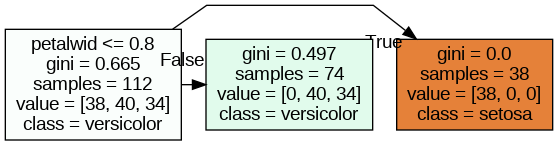

In [ ]:
#
# not as nice-looking, but all-in-one:
#

import pydotplus #pip install pydotplus
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell


<br>

#### The online tree-visualizer is at [http://viz-js.com/](http://viz-js.com/)

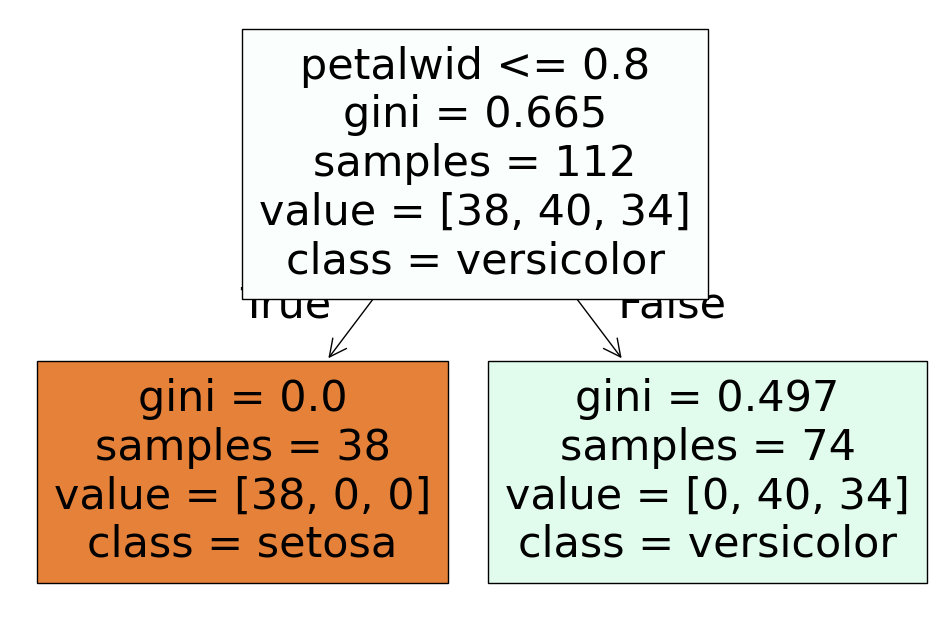

In [ ]:
#
# Let's render it right here!

import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Treeing!
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(dtree_model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

plt.show()

In [ ]:
#
# Now, we TUNE the model (with cross-validation)...
#
# We used a depth of 1    (only 1 split)
# There's NO way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate"
#   + deeper always has the potential to be more accurate
#   + but at the risk of _overfitting_ the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#   + A heuristic: "Choose the _smallest_ depth at which the accuracy has plateaued"
#   + that is, is close to maximum...
#

In [ ]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,20):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")

depth:  1  cv accuracy:  0.6964
depth:  2  cv accuracy:  0.9458
depth:  3  cv accuracy:  0.9640
depth:  4  cv accuracy:  0.9553
depth:  5  cv accuracy:  0.9462
depth:  6  cv accuracy:  0.9462
depth:  7  cv accuracy:  0.9462
depth:  8  cv accuracy:  0.9462
depth:  9  cv accuracy:  0.9553
depth: 10  cv accuracy:  0.9462
depth: 11  cv accuracy:  0.9553
depth: 12  cv accuracy:  0.9462
depth: 13  cv accuracy:  0.9553
depth: 14  cv accuracy:  0.9553
depth: 15  cv accuracy:  0.9553
depth: 16  cv accuracy:  0.9462
depth: 17  cv accuracy:  0.9553
depth: 18  cv accuracy:  0.9462
depth: 19  cv accuracy:  0.9462

best_depth = 3 with acc: 0.9640316205533598 is our underfitting/overfitting balance.


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 3


<br>

#### <b>To try</b>:  showing the depth 2+ tree

In [ ]:
#
# Now, let's see the tree!
#

filename = 'tree_data2.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file tree_data2.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 2.6\ngini = 0.665\nsamples = 112\nvalue = [38, 40, 34]\nclass = versicolor", fillcolor="#fafefc"] ;
1 [label="gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petallen <= 4.85\ngini = 0.497\nsamples = 74\nvalue = [0, 40, 34]\nclass = versicolor", fillcolor="#e1fbec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor", fillcolor="#39e581"] ;
2 -> 3 ;
4 [label="petalwid <= 1.75\ngini = 0.188\nsamples = 38\nvalue = [0, 4, 34]\nclass = virginica", fillcolor="#9050e8"] ;
2 -> 4 ;
5 [label="gini = 0.49\nsamples = 7\nvalue = [0, 4, 3]\nclass

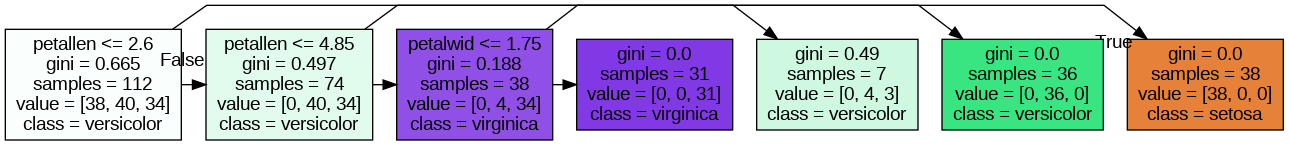

In [ ]:
#
# You will likely have a different name...
#
from IPython import display
graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree_data2.png")
display.Image("./tree_data2.png", width=400)  # adjust for your tree!

In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 0. 0. 1. 2. 2. 0. 2. 0. 2. 1. 1. 2. 2.
 1. 0. 1. 0. 1.]
Actual labels: [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa setosa         
row  19 :    virginica virg

25

In [ ]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 3


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)

    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    #print(f"{name} ({predicted_species})")
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [4.6,3.1,2.0,1.5]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} {SPECIES[result]} from Features {Features}")

I predict 0 setosa from Features [4.6, 3.1, 2.0, 1.5]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [[4.8, 3.1, 1.6, 0.2 ],
[5.7, 2.9, 4.2, 1.3 ],
[5.8, 2.7, 5.1, 1.9 ],
[5.2, 4.1, 1.5, 0.1 ],
[5.4, 3.4, 1.5, 0.4 ],
[5.1, 2.5, 3.0, 1.1 ],
[6.2, 2.9, 4.3, 1.3 ],
[6.3, 3.3, 6.0, 2.5 ],
[5.7, 2.8, 4.1, 1.3 ]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# here are the correctly-coded species: 012001122
# almost always the final one is "wrong"
# (It's a virginica that "acts like" a versicolor.)

I predict 0 from Features [4.8, 3.1, 1.6, 0.2]
I predict 1 from Features [5.7, 2.9, 4.2, 1.3]
I predict 2 from Features [5.8, 2.7, 5.1, 1.9]
I predict 0 from Features [5.2, 4.1, 1.5, 0.1]
I predict 0 from Features [5.4, 3.4, 1.5, 0.4]
I predict 1 from Features [5.1, 2.5, 3.0, 1.1]
I predict 1 from Features [6.2, 2.9, 4.3, 1.3]
I predict 2 from Features [6.3, 3.3, 6.0, 2.5]
I predict 1 from Features [5.7, 2.8, 4.1, 1.3]


### The model is complete
+ and can predict _any_ future...
+ ... though not always correctly.
+ Let's plot many of them!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
petallen = 4.95
petalwid = 1.0

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for sepallen in VERTICAL: # for every sepal length
  for sepalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


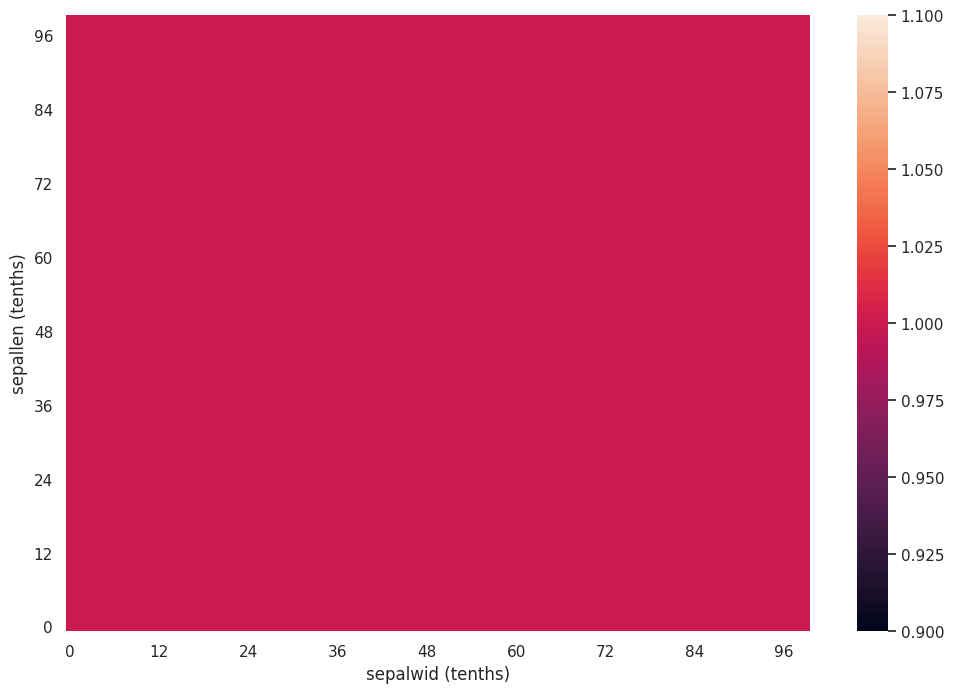

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="sepalwid (tenths)", ylabel="sepallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# let's hold the sepal length and width constant and vary petal len + wid:

sepallen = 3.42
sepalwid = 3.42

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANEv2 = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANEv2[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANEv2[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


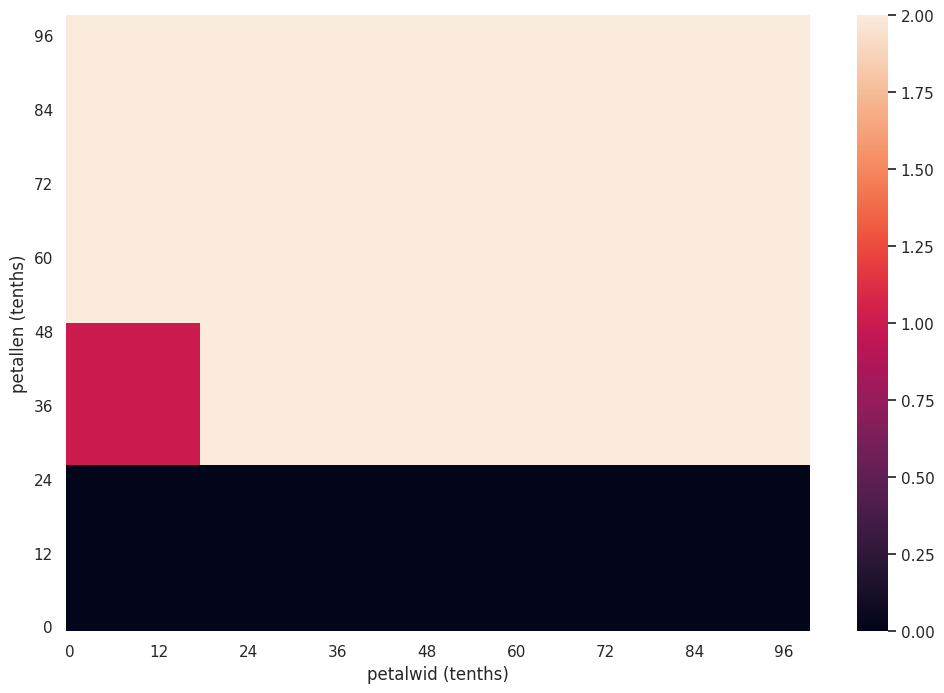

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANEv2)
ax.invert_yaxis()
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# feature importances!
#
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked
#
# feature importances are often even more "important" than predictions,
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.59077975 0.40922025]

Feature     sepallen has    0.00% of the decision-making importance.
Feature     sepalwid has    0.00% of the decision-making importance.
Feature     petallen has   59.08% of the decision-making importance.
Feature     petalwid has   40.92% of the decision-making importance.


In [ ]:
#
# That's it!  Welcome to the world of Decision-Tree models!
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

# Random Forests: Iris Example

In [ ]:
#
# Random Forests!!!
#

# Lots of trees, each using a subset of the data usually at a limited depth
#                These many trees then get together to "vote" on the correct classification...

#
# This is an example of an "ensemble" classifier, because a RF is simply an ensemble of many DTs.
#

In [ ]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=42


In [ ]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  15 correct out of 29 total.
row   0 :   versicolor versicolor     
row   1 :   versicolor virginica      incorrect
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :   versicolor virginica      incorrect
row   6 :   versicolor versicolor     
row   7 :   versicolor virginica      incorrect
row   8 :   versicolor virginica      incorrect
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor virginica      incorrect
row  14 :   versicolor virginica      incorrect
row  15 :   versicolor virginica      incorrect
row  16 :       setosa setosa        

15

In [ ]:
#
# we can get the individual trees, if we want...
#
tree_index = 26   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                       random_state=2125228677)
file rf_tree_026.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 2.5\ngini = 0.658\nsamples = 41\nvalue = [17, 23, 16]\nclass = versicolor", fillcolor="#e1fbec"] ;
1 [label="gini = 0.0\nsamples = 11\nvalue = [17, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.484\nsamples = 30\nvalue = [0, 23, 16]\nclass = versicolor", fillcolor="#c3f7d9"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


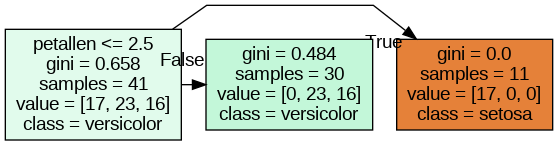

In [ ]:
#
# add locally, to this notebook...
#

from IPython import display
graph = pydotplus.graph_from_dot_data(file_text)
graph.write_png("rf_tree_026.png")
display.Image("./rf_tree_026.png", width=300)  # adjust for your treename/size!

In [ ]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We previously used a depth of 1  and #trees of 42
#
# So, we try several depths to find best_d
#            and several #'s of trees to find best_ntrees
#
# The tradeoff is underfitting/overfitting and time...
#     "too many trees" tends may add noticeably to execution time

In [ ]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# our task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.9285
depth:  1 ntrees: 150 cv accuracy:  0.9372
depth:  1 ntrees: 250 cv accuracy:  0.9281
depth:  2 ntrees:  50 cv accuracy:  0.9455
depth:  2 ntrees: 150 cv accuracy:  0.9455
depth:  2 ntrees: 250 cv accuracy:  0.9455
depth:  3 ntrees:  50 cv accuracy:  0.9545
depth:  3 ntrees: 150 cv accuracy:  0.9545
depth:  3 ntrees: 250 cv accuracy:  0.9545
depth:  4 ntrees:  50 cv accuracy:  0.9545
depth:  4 ntrees: 150 cv accuracy:  0.9458
depth:  4 ntrees: 250 cv accuracy:  0.9545
depth:  5 ntrees:  50 cv accuracy:  0.9545
depth:  5 ntrees: 150 cv accuracy:  0.9372
depth:  5 ntrees: 250 cv accuracy:  0.9545

best_depth: 3 and best_num_trees: 50 are our choices. Acc: 0.9545454545454545


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=3 and ntrees=50


In [ ]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 2. 0. 1. 1. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 1. 2. 2.
 1. 0. 1. 0. 1.]
Actual  labels  : [1. 2. 0. 1. 2. 2. 1. 2. 2. 0. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 1. 2. 2. 2.
 1. 0. 1. 0. 2.]

Results on test set:  26 correct out of 29 total.
row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :   versicolor virginica      incorrect
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :    virginica virginica      
row   8 :    virginica virginica      
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :    virginica virginica      
row  14 :    virginica virginica      
row  15 :    virginica virginica      
row  16 :       setosa setosa         
row  17 :    virginica virginica      
row  18 :       setosa

26

In [ ]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=3 and ntrees=50


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)

    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    #print( f"{name} ({predicted_species})" )
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,2.1]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 2 from Features [6.7, 3.3, 5.7, 2.1]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [[4.8, 3.1, 1.6, 0.2 ],
[5.7, 2.9, 4.2, 1.3 ],
[5.8, 2.7, 5.1, 1.9 ],
[5.2, 4.1, 1.5, 0.1 ],
[5.4, 3.4, 1.5, 0.4 ],
[5.1, 2.5, 3.0, 1.1 ],
[6.2, 2.9, 4.3, 1.3 ],
[6.3, 3.3, 6.0, 2.5 ],
[5.7, 2.8, 4.1, 1.3 ]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' coded species: 012001122

I predict 0 from Features [4.8, 3.1, 1.6, 0.2]
I predict 1 from Features [5.7, 2.9, 4.2, 1.3]
I predict 2 from Features [5.8, 2.7, 5.1, 1.9]
I predict 0 from Features [5.2, 4.1, 1.5, 0.1]
I predict 0 from Features [5.4, 3.4, 1.5, 0.4]
I predict 1 from Features [5.1, 2.5, 3.0, 1.1]
I predict 1 from Features [6.2, 2.9, 4.3, 1.3]
I predict 2 from Features [6.3, 3.3, 6.0, 2.5]
I predict 1 from Features [5.7, 2.8, 4.1, 1.3]


### Let's see our predictive model!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
petallen = 4.2
petalwid = 1.042

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for sepallen in VERTICAL: # for every sepal length
  for sepalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


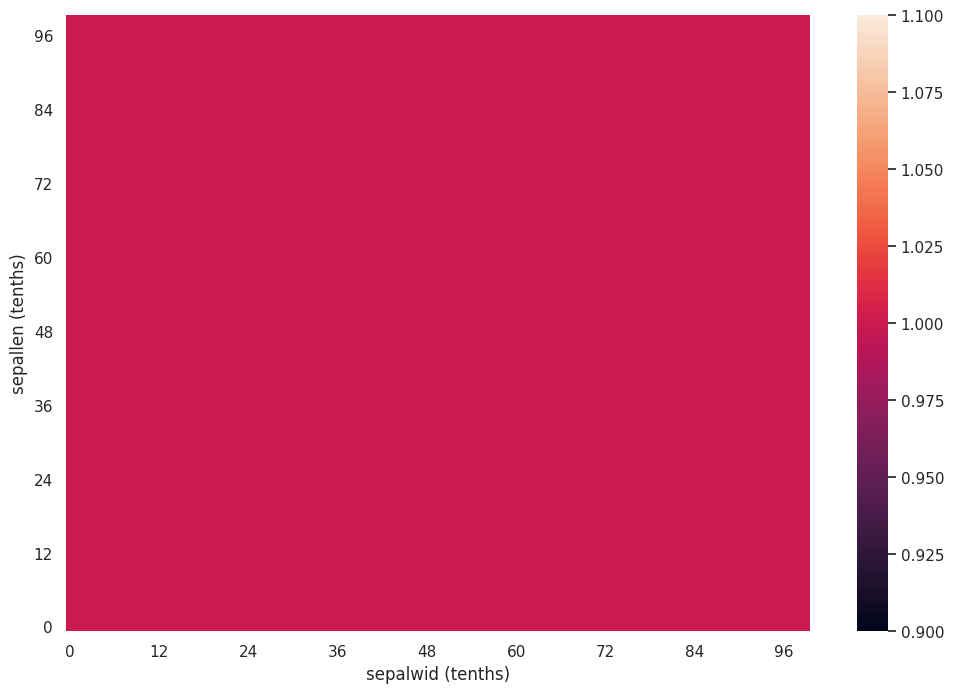

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="sepalwid (tenths)", ylabel="sepallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# let's hold the sepal length and width constant and vary petal len + wid:

sepallen = 3.42
sepalwid = 3.42

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANEv2 = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANEv2[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANEv2[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


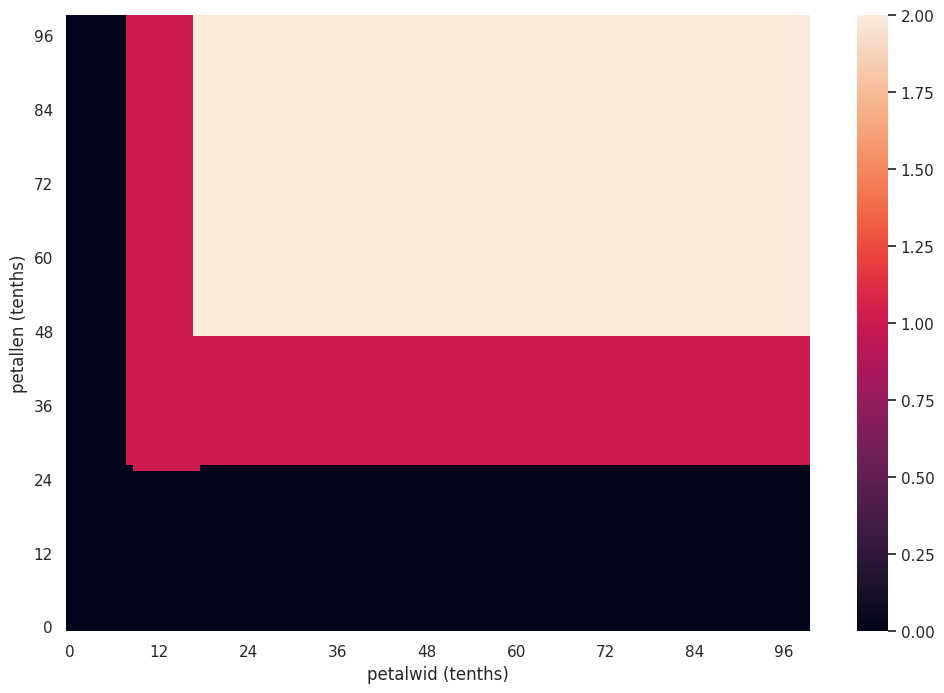

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANEv2)
ax.invert_yaxis()
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

In [ ]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.11844536 0.00867959 0.42594034 0.4469347 ]

Feature     sepallen has   11.84% of the decision-making importance.
Feature     sepalwid has    0.87% of the decision-making importance.
Feature     petallen has   42.59% of the decision-making importance.
Feature     petalwid has   44.69% of the decision-making importance.


In [ ]:
#
# That's the random-forest model!
# Let's consider ourselves not lost, but found,
#       amid so many trees-and-forests!
#
# In fact, the rest of the hw is to run more DT/RF workflows:
#          Births, Digits, and your choice of Titanic-or-something-else
#
#          If you do have a dataset that's of interest, I suggest use that as the "something else"
#
#          (The Titanic dataset is great, but it was a while ago... :-)
#

### Yay!  

Next up:  Births DT and RF

# DT and RF: **Births** data

Next, you'll do the same thing on the births dataset...


### Suggestion:

Open this notebook twice!

**One window** so that you can go cell-by-cell through the iris-cleaning and iris-modeling cells...

**The second window** is to copy-paste-and-adapt the iris approach to the births data

The approach is identical.

The data-details are different, and that's where the adaptation is necessary and important.

Onward:

These are just placeholders.

You'll copy-and-edit ***lots*** of cells from the iris example.

# Data Cleaning: Births data

In [ ]:
#
# a coding cell placeholder
#

# You'll copy lots of cells - mostly coding cells - from the iris example



In [ ]:
# let's read in our births data...
#
# for read_csv, use header=0 when row 0 is a header row
#
filename = 'births.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df

births.csv : file read into a pandas dataframe.


,month,day,births,popularity_versus_median
0,1,1,160369,below
1,1,2,169896,below
2,1,3,180036,below
3,1,4,182854,below
4,1,5,184145,below
...,...,...,...,...
367,12,27,194006,above
368,12,28,201768,above
369,12,29,204806,above
370,12,30,206894,above


In [ ]:
# we can drop a series of data (a row or a column)
# the dimensions each have a numeric value, row~0, col~1, but let's use readable names we define:
ROW = 0
COLUMN = 1

df_clean1 = df[df['births']>250]
df_clean1

# df_clean1 is a new dataframe

,month,day,births,popularity_versus_median
0,1,1,160369,below
1,1,2,169896,below
2,1,3,180036,below
3,1,4,182854,below
4,1,5,184145,below
...,...,...,...,...
367,12,27,194006,above
368,12,28,201768,above
369,12,29,204806,above
370,12,30,206894,above


In [ ]:
ROW = 0
COLUMN = 1

df_clean2 = df_clean1.drop('births', axis=COLUMN)
df_clean2

,month,day,popularity_versus_median
0,1,1,below
1,1,2,below
2,1,3,below
3,1,4,below
4,1,5,below
...,...,...,...
367,12,27,above
368,12,28,above
369,12,29,above
370,12,30,above


In [ ]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean2.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")
print(f"COL_INDEX[ 'day' ] is {COL_INDEX[ 'day' ]}")

COLUMNS is Index(['month', 'day', 'popularity_versus_median'], dtype='object')
COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'popularity_versus_median': 2}
COL_INDEX[ 'day' ] is 1


In [ ]:
AVERAGES = ['below','above']   # int to str
AVERAGES_INDEX = {'below':0,'above':1}  # str to int

def convert_average(averagecat):
    """ return the average index (a unique integer/category) """
    return AVERAGES_INDEX[averagecat]

# Let's try it out...
for name in AVERAGES:
    print(f"{name} maps to {convert_average(name)}")

below maps to 0
above maps to 1


In [ ]:
df_clean3 = df_clean2.copy()  # copy everything AND...

# add a new column, 'irisnum'
df_clean3['avgnum'] = df_clean2['popularity_versus_median'].apply(convert_average)

# let's see...
df_clean3

,month,day,popularity_versus_median,avgnum
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [ ]:
df_tidy =  df_clean3

In [ ]:
#
# We'll construct the new filename:
old_basename = filename[:-4]                      # remove the ".csv"
cleaned_filename = old_basename + "_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_tidy.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is births_cleaned.csv


In [ ]:
df_tidy_reread = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df_tidy_reread

births.csv : file read into a pandas dataframe.


,month,day,popularity_versus_median,avgnum
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [ ]:
#
# Let's make sure we have all of our helpful variables in one place
#
#   This will be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications

AVERAGES = ['below','above']   # int to str
AVERAGES_INDEX = {'below':0,'above':1}  # str to int

def convert_average(averagecat):
    """ return the average index (a unique integer/category) """
    #print(f"converting {averagecat}...")
    return AVERAGES_INDEX[averagecat]

# Let's try it out...
for name in AVERAGES:
    print(f"{name} maps to {convert_average(name)}")

COLUMNS is Index(['month', 'day', 'popularity_versus_median', 'avgnum'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'popularity_versus_median': 2, 'avgnum': 3}


below maps to 0
above maps to 1


# Data Modeling: Births data


In [ ]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [ ]:
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

births_cleaned.csv : file read into a pandas dataframe.


,month,day,popularity_versus_median,avgnum
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [ ]:
#
# All of the columns need to be numeric, we'll drop irisname
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop( 'popularity_versus_median', axis=COLUMN )
df_model1

,month,day,avgnum
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
367,12,27,1
368,12,28,1
369,12,29,1
370,12,30,1


In [ ]:
#
# Let's make sure we have all of our helpful variables in one place
#
#   This will be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications

AVERAGES = ['below','above']   # int to str
AVERAGES_INDEX = {'below':0,'above':1}  # str to int

def convert_average(averagecat):
    """ return the average index (a unique integer/category) """
    #print(f"converting {averagecat}...")
    return AVERAGES_INDEX[averagecat]

# Let's try it out...
for name in AVERAGES:
    print(f"{name} maps to {convert_average(name)}")

COLUMNS is Index(['month', 'day', 'avgnum'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'avgnum': 2}


below maps to 0
above maps to 1


In [ ]:
#
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure it's all floating point  (www.tutorialspoint.com/numpy/numpy_data_types.htm)
print(A[0:5])               # A is too big, let's just sanity-check


[[1. 1. 0.]
 [1. 2. 0.]
 [1. 3. 0.]
 [1. 4. 0.]
 [1. 5. 0.]]


In [ ]:
#
# Also, nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 366 rows and 3 cols


In [ ]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 140
print(f"birthday #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

averages_index = COL_INDEX['avgnum']
averages_num = int(round(A[n][averages_index]))
averages = AVERAGES[averages_num]
print(f"  Its birthrate is {averages} average (i.e., {averages_num})")

birthday #140 is [ 5. 20.  1.]
  Its month is 5.0
  Its day is 20.0
  Its avgnum is 1.0
  Its birthrate is above average (i.e., 1)


In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:2]  # X (features) ... is all rows, columns 0, 1
y_all = A[:,2]    # y (labels) ... is all rows, column 2 only

print(f"y_all (just the labels)   are \n {y_all}")
print(f"X_all (just the features - a few) are \n {X_all[0:5]}")


+++ Start of data definitions +++

y_all (just the labels)   are 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.

In [ ]:
#
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 

In [ ]:
#
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")

training with 292 rows;  testing with 74 rows

Held-out data... (testing data: 74)
y_test: [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]

X_test (few rows): [[ 7. 12.]
 [ 2.  3.]
 [ 1. 16.]
 [11.  6.]
 [ 2. 27.]]

Data used for modeling... (training data: 292)
y_train: [0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1

In [ ]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 1


In [ ]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]
Actual  labels  : [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]

Results on test set:  59 correct out of 74 total.


In [ ]:
#
# Let's print these more helpfully, in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {AVERAGES[p]:>12s} {AVERAGES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)

row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below above          incorrect
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        below below          
row  10 :        above below          incorrect
row  11 :        below below          
row  12 :        above below          incorrect
row  13 :        below above          incorrect
row  14 :        below below          
row  15 :        above above          
row  16 :        below below          
row  17 :        above above          
row  18 :        above above          
row  19 :        below below          
row  20 :        below below          
row  21 :        above below          incorrect
row  22 :        below below          
row  23 :        above above          
r

59

In [ ]:
#
# Now, let's see the tree!
#

filename = 'births_tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=AVERAGES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file births_tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.499\nsamples = 292\nvalue = [141, 151]\nclass = above", fillcolor="#f2f9fd"] ;
1 [label="gini = 0.209\nsamples = 118\nvalue = [104, 14]\nclass = below", fillcolor="#e89254"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.335\nsamples = 174\nvalue = [37, 137]\nclass = above", fillcolor="#6eb7ec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


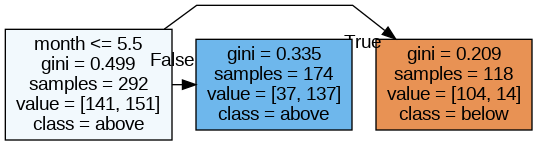

In [ ]:
#
# not as nice-looking, but all-in-one:
#

import pydotplus #pip install pydotplus
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("tree.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell


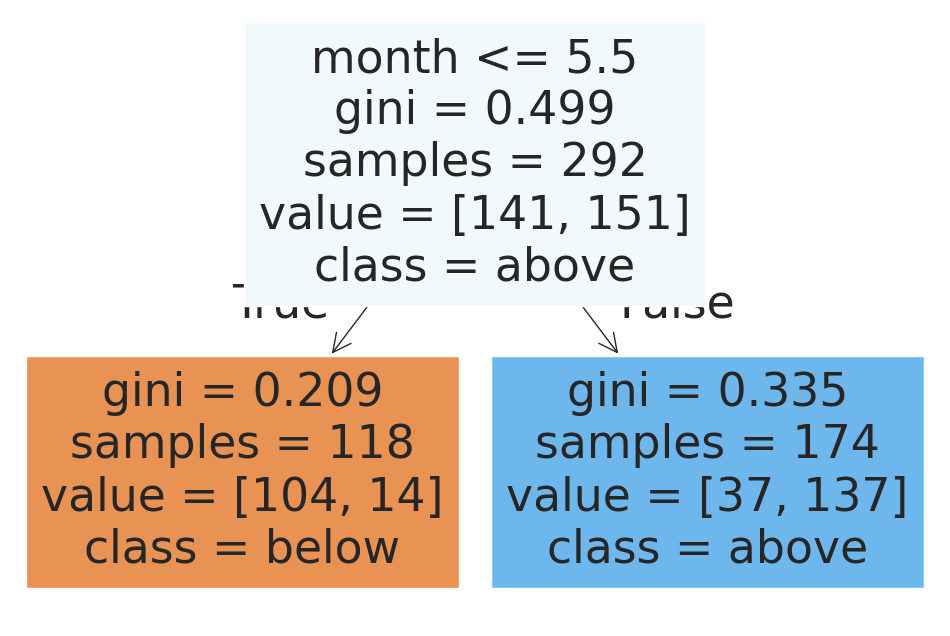

In [ ]:
#
# Let's render it right here!

import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Treeing!
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(dtree_model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=AVERAGES,      # and these!!
                   filled=True)

plt.show()

In [ ]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,20):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")

depth:  1  cv accuracy:  0.8252
depth:  2  cv accuracy:  0.8252
depth:  3  cv accuracy:  0.8560
depth:  4  cv accuracy:  0.8389
depth:  5  cv accuracy:  0.8184
depth:  6  cv accuracy:  0.8149
depth:  7  cv accuracy:  0.8216
depth:  8  cv accuracy:  0.8251
depth:  9  cv accuracy:  0.8217
depth: 10  cv accuracy:  0.8115
depth: 11  cv accuracy:  0.8115
depth: 12  cv accuracy:  0.8081
depth: 13  cv accuracy:  0.8150
depth: 14  cv accuracy:  0.8217
depth: 15  cv accuracy:  0.8150
depth: 16  cv accuracy:  0.8217
depth: 17  cv accuracy:  0.8217
depth: 18  cv accuracy:  0.8217
depth: 19  cv accuracy:  0.8150

best_depth = 3 with acc: 0.8560490940970193 is our underfitting/overfitting balance.


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 3


In [ ]:
#
# Now, let's see the tree!
#

filename = 'births_tree_data2.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=AVERAGES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file births_tree_data2.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.499\nsamples = 292\nvalue = [141, 151]\nclass = above", fillcolor="#f2f9fd"] ;
1 [label="month <= 3.5\ngini = 0.209\nsamples = 118\nvalue = [104, 14]\nclass = below", fillcolor="#e89254"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="day <= 25.5\ngini = 0.313\nsamples = 67\nvalue = [54, 13]\nclass = below", fillcolor="#eb9f69"] ;
1 -> 2 ;
3 [label="gini = 0.357\nsamples = 56\nvalue = [43, 13]\nclass = below", fillcolor="#eda775"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = below", fillcolor="#e58139"] ;
2 -> 4 ;
5 [label="day <= 19.5\ngini = 0.038\nsamples = 51\nvalue = [50, 1]\nclass = below", fillcolor="#e6843d"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 

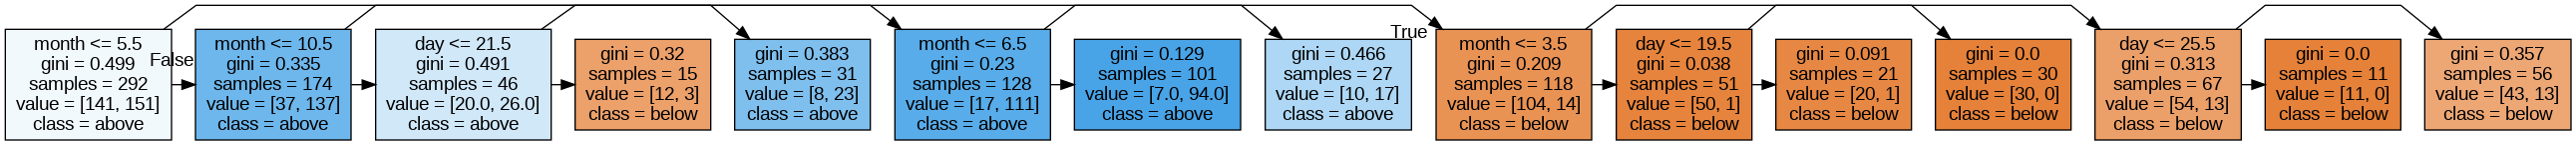

In [ ]:
#
# You will likely have a different name...
#
from IPython import display
graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("births_tree_data2.png")
display.Image("./births_tree_data2.png", width=400)  # adjust for your tree!

In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]
Actual labels: [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]

row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below above          incorrect
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        below below          
row  10 :        above below          incorrect
row  11 :        below below          
row  12 

59

In [ ]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 3


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of twi features
                [ month, day ]
        output: the predicted average of a birthdat, from
                  below (0), above (1)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_avg = dtree_model_final.predict(our_features)

    predicted_avg = int(round(predicted_avg[0]))  # unpack one element
    name = AVERAGES[predicted_avg]
    #print(f"{name} ({predicted_species})")
    return predicted_avg

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [8, 17]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} {AVERAGES[result]} from Features {Features}")

I predict 1 above from Features [8, 17]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [[0,0],
       [0,1],
       [0,2],
       [0,3],
       [0,4],
       [0,5],
       [4,31],
       [6,32]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# here are the correctly-coded averages: 00000000
# almost always the final one is "wrong"


I predict 0 from Features [0, 0]
I predict 0 from Features [0, 1]
I predict 0 from Features [0, 2]
I predict 0 from Features [0, 3]
I predict 0 from Features [0, 4]
I predict 0 from Features [0, 5]
I predict 0 from Features [4, 31]
I predict 1 from Features [6, 32]


In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:

VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for day in VERTICAL:
  for month in HORIZONT:
    Features = [ month, day ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - below
1 - above


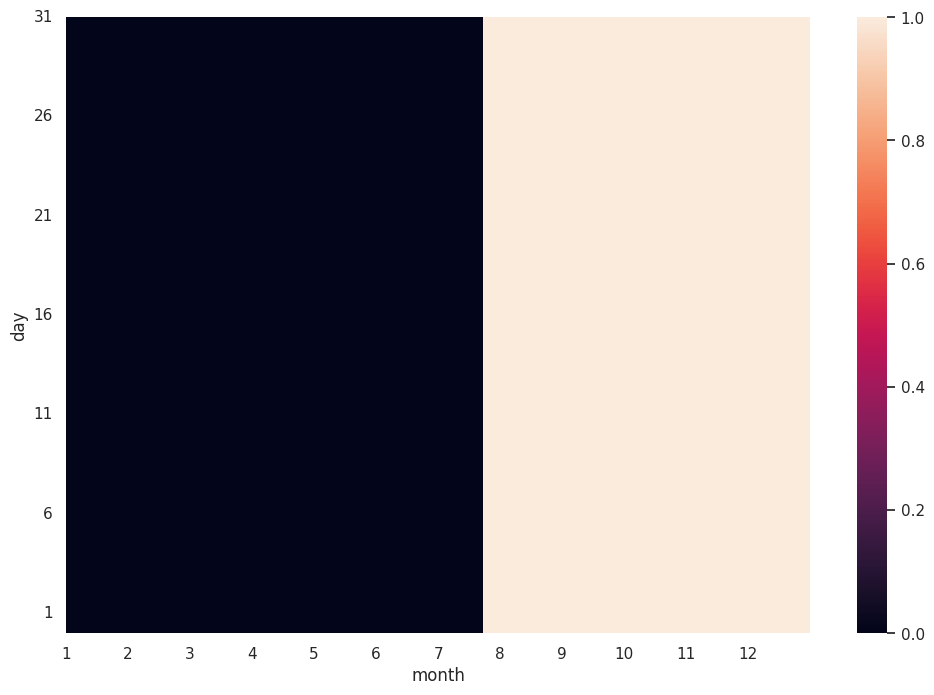

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="month", ylabel="day")
month_labels = list(range(1,13))
ax.set_xticks([i * (100/12) for i in range(12)])
ax.set_xticklabels(month_labels)

day_labels = list(range(1, 32, 5))  # Show day labels like 1, 6, 11, ..., 31
ax.set_yticks([i * (100/31) for i in day_labels])
ax.set_yticklabels([str(d) for d in day_labels])


print("Remember our species-to-number mapping:")
print("0 - below")
print("1 - above")

In [ ]:
#
# feature importances!
#
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked
#
# feature importances are often even more "important" than predictions,
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.95126802 0.04873198]

Feature        month has   95.13% of the decision-making importance.
Feature          day has    4.87% of the decision-making importance.


In [ ]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1          # we don't know what depth to use, so we guess...
best_num_trees = 36   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=36


In [ ]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]
Actual  labels  : [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]

Results on test set:  59 correct out of 74 total.
row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below above          incorrect
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        below below          
row  10 :        above below          inco

59

In [ ]:
#
# we can get the individual trees, if we want...
#
tree_index = 26  # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'births_rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=AVERAGES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                       random_state=1078059823)
file births_rf_tree_026.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="month <= 5.5\ngini = 0.498\nsamples = 121\nvalue = [69, 77]\nclass = above", fillcolor="#eaf5fc"] ;
1 [label="gini = 0.188\nsamples = 46\nvalue = [51, 6]\nclass = below", fillcolor="#e89050"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.323\nsamples = 75\nvalue = [18, 71]\nclass = above", fillcolor="#6bb6ec"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


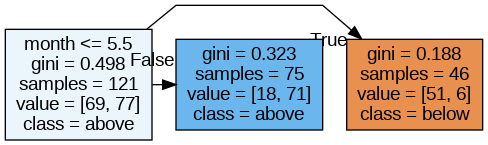

In [ ]:
#
# add locally, to this notebook...
#

from IPython import display
graph = pydotplus.graph_from_dot_data(file_text)
graph.write_png("births_rf_tree_026.png")
display.Image("./births_rf_tree_026.png", width=300)  # adjust for your treename/size!

In [ ]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,11):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# our task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.8252
depth:  1 ntrees: 150 cv accuracy:  0.8252
depth:  1 ntrees: 250 cv accuracy:  0.8252
depth:  2 ntrees:  50 cv accuracy:  0.8252
depth:  2 ntrees: 150 cv accuracy:  0.8252
depth:  2 ntrees: 250 cv accuracy:  0.8217
depth:  3 ntrees:  50 cv accuracy:  0.8184
depth:  3 ntrees: 150 cv accuracy:  0.8218
depth:  3 ntrees: 250 cv accuracy:  0.8218
depth:  4 ntrees:  50 cv accuracy:  0.8458
depth:  4 ntrees: 150 cv accuracy:  0.8321
depth:  4 ntrees: 250 cv accuracy:  0.8320
depth:  5 ntrees:  50 cv accuracy:  0.8390
depth:  5 ntrees: 150 cv accuracy:  0.8492
depth:  5 ntrees: 250 cv accuracy:  0.8458
depth:  6 ntrees:  50 cv accuracy:  0.8389
depth:  6 ntrees: 150 cv accuracy:  0.8491
depth:  6 ntrees: 250 cv accuracy:  0.8456
depth:  7 ntrees:  50 cv accuracy:  0.8286
depth:  7 ntrees: 150 cv accuracy:  0.8594
depth:  7 ntrees: 250 cv accuracy:  0.8457
depth:  8 ntrees:  50 cv accuracy:  0.8288
depth:  8 ntrees: 150 cv accuracy:  0.8389
depth:  8 n

In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=7 and ntrees=150


In [ ]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]
Actual  labels  : [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1.]

Results on test set:  63 correct out of 74 total.
row   0 :        above above          
row   1 :        below below          
row   2 :        below below          
row   3 :        above below          incorrect
row   4 :        below below          
row   5 :        above above          
row   6 :        below above          incorrect
row   7 :        below below          
row   8 :        above below          incorrect
row   9 :        below below          
row  10 :        below below          
row

63

In [ ]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=7 and ntrees=150


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)

    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    #print( f"{name} ({predicted_species})" )
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [0,0]   # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict 0 from Features [0, 0]


In [ ]:
#
# try it on new, "unseen" data!
#

LoF = [
[9,11],
[7,4],
[2,29],
[12,25],
[1,1 ],
[12,31 ]]

for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' coded species: 012001122

I predict 1 from Features [9, 11]
I predict 0 from Features [7, 4]
I predict 0 from Features [2, 29]
I predict 0 from Features [12, 25]
I predict 0 from Features [1, 1]
I predict 1 from Features [12, 31]


In [ ]:
VERTICAL = np.arange(0,10,.1) # array of vertical input values
HORIZONT = np.arange(0,10,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array

row = 0
col = 0
for day in VERTICAL: # for every sepal length
  for month in HORIZONT: # for every sepal width
    Features = [ month, day ]
    output = predictive_model(Features)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")  # so we know it's running
  if row % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner


..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - below
1 - above


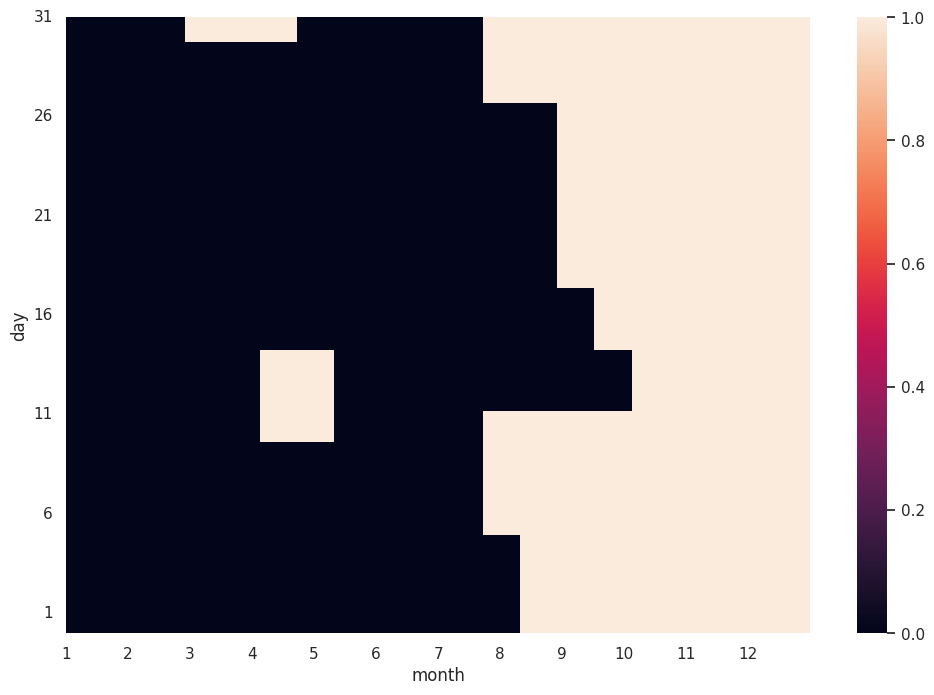

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="month", ylabel="day")
month_labels = list(range(1,13))
ax.set_xticks([i * (100/12) for i in range(12)])
ax.set_xticklabels(month_labels)

day_labels = list(range(1, 32, 5))  # Show day labels like 1, 6, 11, ..., 31
ax.set_yticks([i * (100/31) for i in day_labels])
ax.set_yticklabels([str(d) for d in day_labels])


print("Remember our species-to-number mapping:")
print("0 - below")
print("1 - above")

In [ ]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.69117005 0.30882995]

Feature        month has   69.12% of the decision-making importance.
Feature          day has   30.88% of the decision-making importance.


# DT and RF: **Digits** data

Next, you'll do the same thing on the digits dataset...

Same suggestion as before!


Notice that you're getting more and more practice with the "modeling workflow."

It's not an exaggeration to say that this is, in essence, what all ML/modeling efforts look-and-feel like!

# Data Cleaning: Digits data

In [ ]:
filename = 'digits.csv'
df = pd.read_csv(filename)        # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df

digits.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [ ]:
# we can drop a series of data (a row or a column)
# the dimensions each have a numeric value, row~0, col~1, but let's use readable names we define:
ROW = 0
COLUMN = 1

df_clean1 = df.drop('excerpted from http://yann.lecun.com/exdb/mnist/', axis=COLUMN)
df_clean1

# df_clean1 is a new dataframe, without that unwanted column

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [ ]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")
print(f"COL_INDEX[ 'pix0' ] is {COL_INDEX[ 'pix0' ]}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')
COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23':

In [ ]:
df_tidy =  df_clean1

In [ ]:
#
# That's it!  Then, and write it out to digits_cleaned.csv

# We'll construct the new filename:
old_basename = filename[:-4]                      # remove the ".csv"
cleaned_filename = old_basename + "_cleaned.csv"  # name-creating
print(f"cleaned_filename is {cleaned_filename}")

# Now, save
df_tidy.to_csv(cleaned_filename, index_label=False)  # no "index" column...

cleaned_filename is digits_cleaned.csv


In [ ]:
df_tidy_reread = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{filename} : file read into a pandas dataframe.")
df_tidy_reread

digits.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [ ]:
COLUMNS = df_tidy.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [ ]:
cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)   # encoding="utf-8" et al.
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

digits_cleaned.csv : file read into a pandas dataframe.


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


# Data Modeling: Digits data

In [ ]:
df_model1 = df_tidy

In [ ]:
COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [ ]:
DIGITS = list(range(10))
print(f"DIGITS is {DIGITS}")


DIGITS is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
#
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure it's all floating point  (www.tutorialspoint.com/numpy/numpy_data_types.htm)
print(A[0:5])               # A is too big, let's just sanity-check

[[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.  8.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.  9.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.  0.  0.
   0. 14. 16. 12.  0.  0.  0.  1. 10. 16. 16. 12.  0.  0.  0.  3. 12. 14.
  16.  9.  0.  0.  0.  0.  0.  5. 16. 15.  0.

In [ ]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [ ]:
# let's use all our variables, to reinforce that we have
# (1) their names...
# (2) access and control over each...

# choose a row index, n:
n = 140
print(f"digit #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

digit_index = COL_INDEX['actual_digit']
digit_num = int(round(A[n][digit_index]))
digit = DIGITS[digit_num]
print(f"  Its digit is {digit} (i.e., {digit_num})")

digit #140 is [ 0.  0.  6. 15.  6.  0.  0.  0.  0.  0. 14. 11. 13.  4.  0.  0.  0.  0.
 11.  7.  7. 13.  0.  0.  0.  0.  5. 16. 16. 16.  1.  0.  0.  0.  0.  0.
  0. 14.  7.  0.  0.  0.  0.  0.  0. 10. 13.  0.  0.  0.  2. 11.  0. 11.
 12.  0.  0.  0.  5. 16. 14.  9.  4.  0.  9.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 6.0
  Its pix3 is 15.0
  Its pix4 is 6.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 14.0
  Its pix11 is 11.0
  Its pix12 is 13.0
  Its pix13 is 4.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 11.0
  Its pix19 is 7.0
  Its pix20 is 7.0
  Its pix21 is 13.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 5.0
  Its pix27 is 16.0
  Its pix28 is 16.0
  Its pix29 is 16.0
  Its pix30 is 1.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 0.0
  Its pix34 is 0.0
  Its pix35 is 0.0
  Its pix36 is 0.0
  Its pix37 is 14.0

In [ ]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:63]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels)   are \n {y_all}")
print(f"X_all (just the features - a few) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the features - a few) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.  0.  0.
   0. 14. 16

In [ ]:
#
# we scramble the data, to remove (potential) dependence on its ordering:
#
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_permed = X_all[indices]              # we apply the _same_ permutation to each!
y_permed = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_permed}")
print(f"The corresponding data rows are \n {X_permed[0:5]}")

The scrambled labels/species are 
 [9. 2. 6. ... 8. 8. 0.]
The corresponding data rows are 
 [[ 0.  0.  0.  7. 16. 16. 11.  0.  0.  0.  6. 16. 16. 16. 16.  0.  0.  0.
  11. 16. 16. 16.  9.  0.  0.  0.  2.  9. 11. 14. 10.  0.  0.  0.  0.  0.
   0. 10.  6.  0.  0.  0.  0.  0.  4. 11.  1.  0.  0.  0.  0.  2. 14.  2.
   0.  0.  0.  0.  0. 11.  3.  0.  0.]
 [ 0.  4. 16. 15.  1.  0.  0.  0.  0.  8. 14. 16.  4.  0.  0.  0.  0.  5.
   8. 16.  4.  0.  0.  0.  0.  0.  0. 12.  8.  0.  0.  0.  0.  0.  1. 15.
   7.  0.  0.  0.  0.  0.  5. 16.  3.  6.  9.  0.  0.  3. 15. 15.  8. 13.
  15.  0.  0.  4. 15. 16. 16. 16.  7.]
 [ 0.  0.  2. 14.  1.  0.  0.  0.  0.  0. 11. 12.  1.  0.  0.  0.  0.  1.
  15.  4.  0.  0.  0.  0.  0.  5. 13.  0.  0.  0.  0.  0.  0.  7. 12. 12.
  16. 13.  2.  0.  0.  4. 16. 12.  6.  6. 11.  0.  0.  0. 14.  9.  0.  5.
  13.  0.  0.  0.  3. 11. 15. 14.  1.]
 [ 0.  1.  8. 13. 15.  5.  0.  0.  0.  8. 14.  7. 16. 14.  0.  0.  0. 10.
  12.  1. 10. 16.  2.  0.  0.  2. 12. 14. 15. 16. 

In [ ]:
#
# We next separate into test data and training data ...
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [5. 0. 2. 1. 9. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 9.
 3. 8. 5. 1. 0. 6. 4. 3. 2. 0. 8. 3. 5. 5. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 8. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 3. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 6. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0.

In [ ]:
#
# +++ This is the "Model-building and Model-training Cell"
#
# Create a DT model and train it!
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so let's guess 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# Let's train the model.   It's this one line:
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 1


In [ ]:
#
# +++ This cell will "Model-testing Cell"
#
# Now, let's see how well our model does on our "held-out data" (the testing data)
#

# We run our test set:

# the function knn_model.predict is the instantiation of our model
# it's what runs the k-nearest-neighbors algorithm:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {p:>12d} {a:<12d}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!

compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :            1 5              incorrect
row   1 :            0 0              
row   2 :            1 2              incorrect
row   3 :            1 1              
row   4 :            1 9              incorrect
row   5 :            1 6              incorrect
row   6 :            1 4              incorrect
row   7 :            1 5              incorrect
row   8 :            1 7              incorrect
row   9 :            1 2              incorrect
row  10 :            1 6              incorrect
row  11 :            1 2              incorrect
row  12 :            1 7              incorrect
row  13 :            0 5              incorrect
row  14 :            0 9              incorrect
row  15 :            0 9              incorrect
row  16 :            1 4              incorrect
row  17 :            1 1              
row  18 :            1 2              incorrect
row  19 :            1 3              incorrect
row  20 :            

61

In [ ]:
#
# Now, let's see the tree!
#

filename = 'digits_tree_data.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:63], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=[str(i) for i in range(10)],      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file digits_tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [145, 146, 138, 138, 138, 146, 141, 144, 142, 136]\nclass = 1", fillcolor="#ffffff"] ;
1 [label="gini = 0.532\nsamples = 217\nvalue = [141, 0, 3, 1, 5, 21, 3, 0, 2, 41]\nclass = 0", fillcolor="#f0b78e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.888\nsamples = 1197\nvalue = [4, 146, 135, 137, 133, 125, 138, 144, 140, 95]\nclass = 1", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


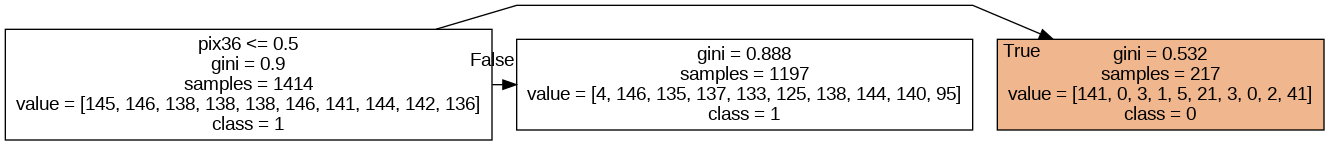

In [ ]:
#
# not as nice-looking, but all-in-one:
#

import pydotplus #pip install pydotplus
from IPython import display

graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("digits_tree_data.png")  # to a file - you'll see it in content at left
display.Image(graph.create_png())  # to this cell


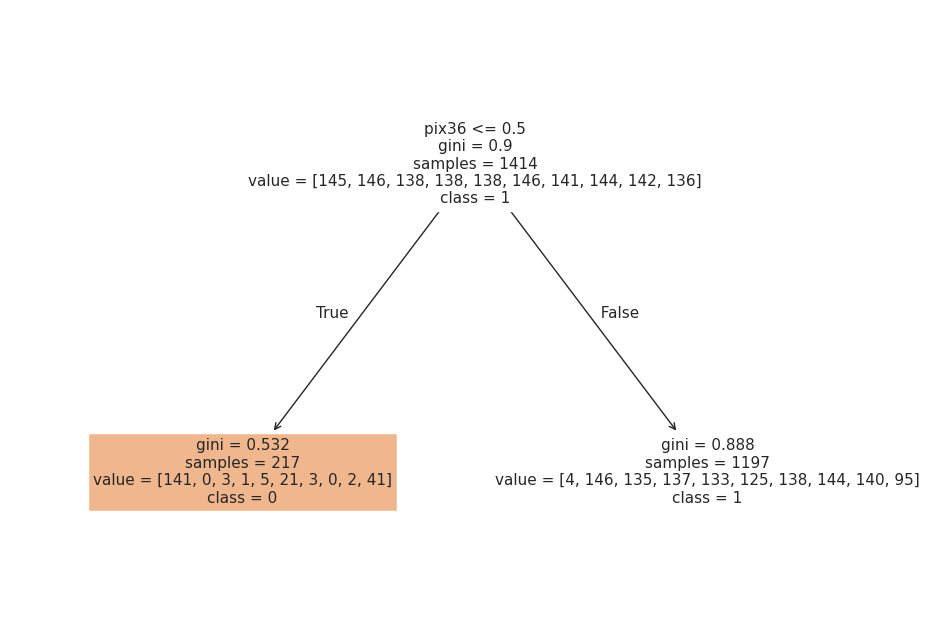

In [ ]:
#
# Let's render it right here!

import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:63]

#
# Treeing!
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(dtree_model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=[str(i) for i in range(10)],      # and these!!
                   filled=True)

plt.show()

In [ ]:
#
# To compare different tree-depths, we use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_d = 1
best_accuracy = 0.0

for d in range(1,20):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # we usually don't want to see the five individual scores
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_d = d



# assign best value of d to best_depth
best_depth = best_d   # may have to hand-tune this, depending on what happens...
print()
print(f"best_depth = {best_depth} with acc: {best_accuracy} is our underfitting/overfitting balance.")

depth:  1  cv accuracy:  0.2030
depth:  2  cv accuracy:  0.3182
depth:  3  cv accuracy:  0.4844
depth:  4  cv accuracy:  0.5679
depth:  5  cv accuracy:  0.6718
depth:  6  cv accuracy:  0.7567
depth:  7  cv accuracy:  0.8090
depth:  8  cv accuracy:  0.8218
depth:  9  cv accuracy:  0.8196
depth: 10  cv accuracy:  0.8310
depth: 11  cv accuracy:  0.8373
depth: 12  cv accuracy:  0.8295
depth: 13  cv accuracy:  0.8430
depth: 14  cv accuracy:  0.8402
depth: 15  cv accuracy:  0.8310
depth: 16  cv accuracy:  0.8472
depth: 17  cv accuracy:  0.8352
depth: 18  cv accuracy:  0.8331
depth: 19  cv accuracy:  0.8317

best_depth = 16 with acc: 0.8472270255369271 is our underfitting/overfitting balance.


In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# this time, with the best depth, best_d, found by cross-validation model tuning:
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth)

Created and trained a DT classifier with max depth = 16


In [ ]:
#
# Now, let's see the tree!
#

filename = 'digits_tree_data2.gv'    # sometimes .dot is used, instead of .gv

tree.export_graphviz(dtree_model_tuned, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:63], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=[str(i) for i in range(10)],      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

file digits_tree_data2.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1414\nvalue = [145, 146, 138, 138, 138, 146, 141, 144, 142, 136]\nclass = 1", fillcolor="#ffffff"] ;
1 [label="pix28 <= 4.5\ngini = 0.532\nsamples = 217\nvalue = [141, 0, 3, 1, 5, 21, 3, 0, 2, 41]\nclass = 0", fillcolor="#f0b78e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 0.5\ngini = 0.16\nsamples = 154\nvalue = [141.0, 0.0, 2.0, 0.0, 5.0, 3.0, 1.0, 0.0, 0.0, 2.0]\nclass = 0", fillcolor="#e78c4a"] ;
1 -> 2 ;
3 [label="pix41 <= 5.5\ngini = 0.694\nsamples = 11\nvalue = [1, 0, 1, 0, 5, 3, 1, 0, 0, 0]\nclass = 4", fillcolor="#cef8f0"] ;
2 -> 3 ;
4 [label="pix6 <= 1.0\ngini = 0.667\nsamples = 6\nvalue = [1, 0, 1, 0, 0, 3, 1, 0, 0, 0]\nclass = 5", fillcolor="#b0d8f5

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.334531 to fit



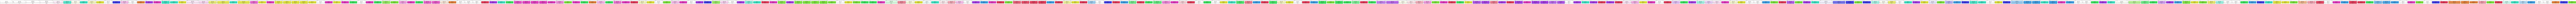

In [ ]:
#
# You will likely have a different name...
#
from IPython import display
graph = pydotplus.graph_from_dot_data(all_file_text)
graph.write_png("digits_tree_data2.png")
display.Image("./digits_tree_data2.png", width=400)  # adjust for your tree!

In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5. 0. 2. 1. 9. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 2. 5. 8. 9. 9. 3. 4. 7. 0. 8. 3. 6. 4. 8. 1. 3. 1. 9. 1. 3.
 7. 8. 5. 1. 0. 6. 4. 8. 1. 0. 8. 2. 5. 5. 8. 6. 7. 4. 9. 0. 4. 4. 0. 8.
 0. 9. 7. 8. 5. 6. 0. 8. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 9. 2. 4. 3. 7.
 8. 6. 7. 1. 5. 8. 5. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 1. 1. 1. 9. 4. 8. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 4. 4. 4. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 6. 1. 0. 0. 8. 5. 3. 7. 5. 8. 8. 4. 0. 6. 6. 9.
 8. 5. 4. 1. 2. 6. 8. 8. 1. 4. 2. 3. 5. 7. 8. 1. 5. 2. 5. 8. 4. 3. 1. 0.
 0. 6. 8. 2. 9. 9. 1. 5. 1. 3. 9. 9. 3. 0. 2. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 7. 2. 2. 9. 0. 9. 3. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 4. 6. 1. 7. 3. 1. 4. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 4. 1. 5. 2. 8. 0. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 9. 6. 7. 9. 3. 8. 3. 3. 3.
 3. 2. 1. 9. 5. 4. 7. 8. 9. 5. 1.

302

In [ ]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth)

Created and trained a 'final' DT classifier with max depth = 16


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    Features = Features[:63]
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_digits = dtree_model_final.predict(our_features)

    predicted_digits = int(round(predicted_digits[0]))  # unpack one element
    name = [str(i) for i in range(10)][predicted_digits]

    return predicted_digits

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = list(range(64))  # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {digit} from Features {Features}")

I predict 9 from Features [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [ ]:
#
# feature importances!
#
#     feature importances are computed by tracking which feature is used at each decision-point
#     weighted by how often that decision-point is checked
#
# feature importances are often even more "important" than predictions,
#         because they invite the question, "why" (Here, not a computational, but a biological/botanical q'n)
#

print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.         0.         0.00566756 0.0110146  0.00030449 0.0615779
 0.016202   0.         0.         0.01374475 0.01166289 0.00375288
 0.01883993 0.02011097 0.00209491 0.00062847 0.         0.
 0.01706839 0.02042752 0.04449485 0.07597264 0.00310046 0.
 0.0012479  0.00483625 0.01434896 0.05402418 0.0099772  0.04390401
 0.00114921 0.         0.         0.10059915 0.02610001 0.01091145
 0.07226867 0.02224917 0.0038773  0.         0.         0.00473567
 0.07715206 0.05825294 0.01572495 0.00623968 0.00407673 0.
 0.         0.00144549 0.01290798 0.00720954 0.00711175 0.01408017
 0.02318783 0.         0.         0.         0.00578025 0.00150833
 0.0615867  0.00125695 0.00558432]

Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.00% of the decision-making importance.
Feature         pix2 has    0.57% of the decision-making importance.
Feature         pix3 has    1.10% of the decision-making importance.
Feature         pix4 has    0.03% of the de

In [ ]:
#
# +++ We're back at the "Model-building and Model-training Cell"
#
# Create a RF model and train it!
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier

best_d = 1            # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                                n_estimators=best_num_trees,
                                                max_samples=0.5)
# This max_samples=0.5 is the fraction of rows to use for each DT
# For all of our forests, we will let max_samples be 0.5   We'll explore best_d and best_num_trees...

# we train the model (again, one line):
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_d} and number of trees={best_num_trees}")

Built an RF with depth=1 and number of trees=42


In [ ]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5. 0. 2. 6. 3. 6. 0. 5. 7. 2. 6. 2. 7. 6. 0. 0. 4. 6. 2. 3. 5. 1. 5. 0.
 2. 6. 7. 6. 6. 5. 1. 0. 8. 3. 4. 3. 0. 1. 7. 6. 4. 4. 6. 3. 1. 0. 9. 3.
 3. 1. 5. 5. 0. 6. 0. 1. 2. 0. 1. 3. 5. 1. 8. 6. 7. 0. 9. 0. 7. 7. 0. 7.
 0. 0. 7. 1. 6. 1. 0. 0. 3. 0. 0. 3. 6. 6. 2. 3. 7. 0. 7. 7. 3. 4. 3. 7.
 1. 6. 7. 1. 6. 1. 2. 0. 5. 0. 6. 6. 4. 7. 3. 6. 1. 9. 7. 0. 5. 6. 3. 2.
 1. 7. 2. 1. 1. 0. 4. 1. 2. 6. 3. 6. 3. 3. 1. 6. 2. 5. 7. 5. 4. 1. 1. 0.
 6. 1. 0. 1. 9. 6. 3. 4. 0. 3. 0. 0. 2. 5. 3. 7. 5. 4. 7. 0. 0. 6. 6. 7.
 1. 5. 9. 1. 2. 6. 2. 1. 2. 0. 2. 2. 5. 1. 2. 1. 5. 2. 5. 1. 4. 3. 6. 0.
 0. 6. 1. 7. 8. 3. 4. 5. 4. 3. 9. 0. 3. 0. 6. 0. 0. 0. 6. 2. 3. 8. 0. 6.
 6. 7. 2. 2. 9. 0. 9. 8. 3. 6. 0. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 0. 1. 6. 0. 0. 6. 7. 6. 1. 7. 3. 3. 9. 0. 7. 0. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 2. 6. 9. 0. 6. 3. 5. 2. 1. 6. 6. 0. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 1. 2. 0. 1. 9. 3. 0. 7. 3. 5. 7. 3. 9. 6. 7. 9. 3. 1. 2. 2. 3.
 3. 2. 6. 9. 5. 4. 7. 1. 9. 5. 1.

244

In [ ]:
#
# we can get the individual trees, if we want...
#
tree_index = 26   # which tree
one_rf_tree = rforest_model.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'digits_rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:63], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=[str(i) for i in range(10)],      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

One of the forest's trees is DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=394252433)
file digits_rf_tree_026.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix43 <= 2.5\ngini = 0.896\nsamples = 547\nvalue = [89.0, 82.0, 64.0, 47.0, 65.0, 67.0, 89.0, 82.0, 61.0\n61.0]\nclass = 0", fillcolor="#ffffff"] ;
1 [label="gini = 0.812\nsamples = 181\nvalue = [58, 7, 5, 41, 1, 38, 7, 8, 9, 58]\nclass = 0", fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.867\nsamples = 366\nvalue = [31, 75, 59, 6, 64, 29, 82, 74, 52, 3]\nclass = 6", fillcolor="#fcfcff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


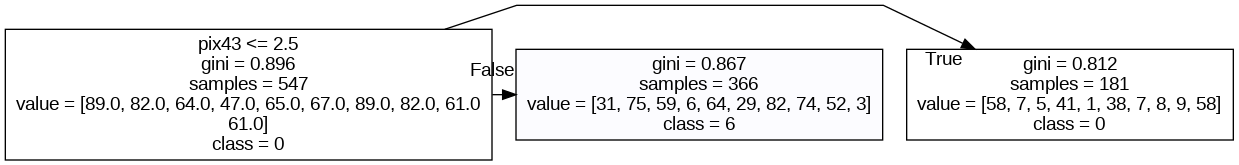

In [ ]:
#
# add locally, to this notebook...
#

from IPython import display
graph = pydotplus.graph_from_dot_data(file_text)
graph.write_png("digits_rf_tree_026.png")
display.Image("./digits_rf_tree_026.png", width=300)  # adjust for your treename/size!

In [ ]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

best_d = 1         # range(1,6)
best_ntrees = 50   # [50,150,250]
best_accuracy = 0

for d in range(1,20):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                        n_estimators=ntrees,
                                                        max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_ntrees = ntrees

#
# our task: assign best values by keeping a "running max"
#
best_depth = best_d
best_num_trees = best_ntrees

print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

#
# remember that the RF lab task is to complete this nested cross-validation loop!
#

depth:  1 ntrees:  50 cv accuracy:  0.6952
depth:  1 ntrees: 150 cv accuracy:  0.7447
depth:  1 ntrees: 250 cv accuracy:  0.7524
depth:  2 ntrees:  50 cv accuracy:  0.8260
depth:  2 ntrees: 150 cv accuracy:  0.8444
depth:  2 ntrees: 250 cv accuracy:  0.8508
depth:  3 ntrees:  50 cv accuracy:  0.8706
depth:  3 ntrees: 150 cv accuracy:  0.8875
depth:  3 ntrees: 250 cv accuracy:  0.8918
depth:  4 ntrees:  50 cv accuracy:  0.9059
depth:  4 ntrees: 150 cv accuracy:  0.9215
depth:  4 ntrees: 250 cv accuracy:  0.9187
depth:  5 ntrees:  50 cv accuracy:  0.9293
depth:  5 ntrees: 150 cv accuracy:  0.9399
depth:  5 ntrees: 250 cv accuracy:  0.9392
depth:  6 ntrees:  50 cv accuracy:  0.9491
depth:  6 ntrees: 150 cv accuracy:  0.9554
depth:  6 ntrees: 250 cv accuracy:  0.9554
depth:  7 ntrees:  50 cv accuracy:  0.9505
depth:  7 ntrees: 150 cv accuracy:  0.9625
depth:  7 ntrees: 250 cv accuracy:  0.9618
depth:  8 ntrees:  50 cv accuracy:  0.9632
depth:  8 ntrees: 150 cv accuracy:  0.9618
depth:  8 n

In [ ]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = best_depth
best_num_trees = best_num_trees
# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=13 and ntrees=250


In [ ]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [5. 0. 2. 1. 8. 6. 4. 5. 7. 2. 6. 2. 7. 5. 9. 9. 4. 1. 2. 3. 1. 8. 5. 4.
 2. 2. 7. 6. 6. 5. 8. 9. 8. 3. 4. 3. 0. 8. 7. 6. 4. 4. 1. 3. 1. 9. 1. 9.
 7. 8. 5. 1. 0. 6. 4. 8. 2. 0. 8. 3. 5. 8. 8. 6. 7. 4. 9. 0. 9. 4. 0. 7.
 0. 9. 7. 8. 5. 4. 0. 5. 3. 4. 4. 3. 6. 6. 2. 3. 7. 0. 2. 7. 3. 4. 3. 7.
 8. 6. 7. 8. 5. 8. 2. 0. 5. 0. 6. 2. 4. 7. 3. 6. 1. 8. 7. 4. 3. 6. 3. 2.
 8. 7. 2. 1. 1. 9. 4. 3. 2. 6. 3. 6. 3. 9. 1. 6. 2. 5. 7. 5. 4. 1. 1. 9.
 2. 1. 9. 1. 9. 6. 3. 4. 4. 1. 0. 0. 2. 5. 3. 7. 5. 2. 8. 4. 0. 6. 6. 7.
 1. 5. 9. 1. 2. 6. 8. 3. 3. 4. 2. 2. 5. 9. 3. 1. 5. 2. 5. 1. 4. 3. 2. 0.
 0. 6. 4. 9. 8. 9. 4. 5. 4. 3. 9. 9. 3. 0. 8. 0. 4. 9. 1. 2. 3. 8. 9. 6.
 2. 9. 2. 2. 9. 0. 1. 2. 3. 5. 4. 7. 0. 6. 5. 4. 7. 8. 3. 5. 5. 3. 0. 7.
 0. 3. 1. 4. 4. 6. 0. 9. 6. 7. 6. 1. 7. 3. 1. 9. 9. 7. 9. 0. 8. 3. 3. 2.
 6. 4. 3. 6. 4. 8. 6. 9. 0. 1. 1. 5. 2. 8. 6. 6. 4. 9. 0. 3. 7. 5. 3. 6.
 1. 4. 9. 8. 2. 4. 1. 9. 3. 0. 7. 3. 5. 7. 9. 9. 6. 7. 9. 3. 8. 2. 2. 3.
 3. 2. 1. 9. 5. 4. 7. 8. 9. 5. 1.

344

In [ ]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")

Built an RF classifier with depth=13 and ntrees=250


In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    Features = Features[:63]
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_digits = dtree_model_final.predict(our_features)

    predicted_digits = int(round(predicted_digits[0]))  # unpack one element
    name = [str(i) for i in range(10)][predicted_digits]

    return predicted_digits

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = list(range(64))  # [4.8,2.7,3.1,0.2] [4.6,3.1,2.0,1.5] [6.7,3.3,5.7,2.1]
result = predictive_model( Features )
print(f"I predict {digit} from Features {Features}")

I predict 9 from Features [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [ ]:
#
# feature importances are often even more "important" than predictions...
#
#    Random forests can provide a much "smoother" measure of feature importance, since
#                   they integrate over so many individual models (each tree)
#
#    That is, it's much less likely that a feature will have 0% importance, unless it never varies
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 2.90044591e-03 1.90127786e-02 1.13660816e-02
 9.43525017e-03 2.14592683e-02 8.00062804e-03 9.18176382e-04
 9.64159090e-05 1.10265708e-02 2.43282900e-02 7.61130369e-03
 1.62638023e-02 2.85684160e-02 6.82420818e-03 6.29262544e-04
 2.37696367e-05 7.66867781e-03 2.04540598e-02 2.67116831e-02
 3.01258131e-02 5.05125837e-02 9.21548555e-03 5.24464633e-04
 4.57104556e-05 1.47979624e-02 4.10501546e-02 2.56801587e-02
 3.04159457e-02 2.43190164e-02 3.37271433e-02 4.09099126e-05
 0.00000000e+00 3.07651294e-02 2.62940705e-02 1.94318442e-02
 3.81622037e-02 1.92355181e-02 2.34879070e-02 0.00000000e+00
 4.59110846e-05 1.19818514e-02 3.43505718e-02 4.17083798e-02
 2.05930521e-02 1.84880745e-02 2.05826432e-02 4.14473715e-05
 2.52104167e-05 2.90785138e-03 1.78721814e-02 2.09351099e-02
 1.51512313e-02 2.50279481e-02 2.38132621e-02 1.55117214e-03
 2.16948379e-05 2.06986035e-03 2.38769171e-02 1.03625244e-02
 2.41620101e-02 2.70671329e-02 1.62328522e-02]

Feature         pix0 has    0.00% of 

<br><br>

a placeholder text cell

In [ ]:
# a placeholder code cell

# **Next week**: Titanic or _your-own-data_

Not required for this week -- but for _next_ week, IST341 will be narrowing project ideas.

One of those possibilities is to choose a dataset of your own (or use the Titanic / housing dataset) and
+ be sure it's cleaned up to the point where it's "tidy"
+ the cleaning can be done in Excel/spreadsheets instead of Python, for sure
+ or, the cleaning can be done in Python -- up to you!
+ Then, model your dataset with DTs and RFs, just as above
+ and, use Neural Nets (which we will feature next week...)

To gain additional insight, you'll find and show the _feature importances_ for your features in your dataset...

Often, these are what generate the most value, because
+ you want to know what features have the most impact
+ you want to know the relative strengths of the features
+ you're waiting for future data on which to run your predictive model! :-)

<br>
<hr>
<br>

You can tell we're evolving into a "final-project" mindset.

The final project does not have to be data-analysis at all. (That said, it's a popular option...) Big-picture, it's best if _whatever the project_ it overlaps with  your work or interests from professional/personal/other class's efforts.

Onward!

In [ ]:
# a placeholder code cell